In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

import sys
sys.path.append('../')
import analysis_utils as utils
utils.load_plotting_setting()

from scipy.fft import rfft, rfftfreq

from scipy.special import erf
from scipy.signal import welch

In [2]:
import importlib
importlib.reload(utils)

<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/gas_collisiions/analyss_notebooks/../analysis_utils.py'>

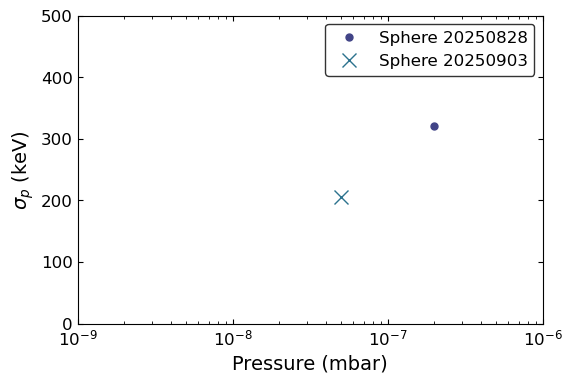

In [16]:
plt.figure(figsize=(6, 4))

plt.plot(2e-7, 320.5, '.', markersize=10, label='Sphere 20250828')
plt.plot(5e-8, 205, 'x', markersize=10, label='Sphere 20250903')

plt.xlim(1e-9, 1e-6)
plt.ylim(0, 500)

plt.xscale('log')
plt.xlabel('Pressure (mbar)')
plt.ylabel(r'$\sigma_p$ (keV)')
plt.legend(edgecolor='k')

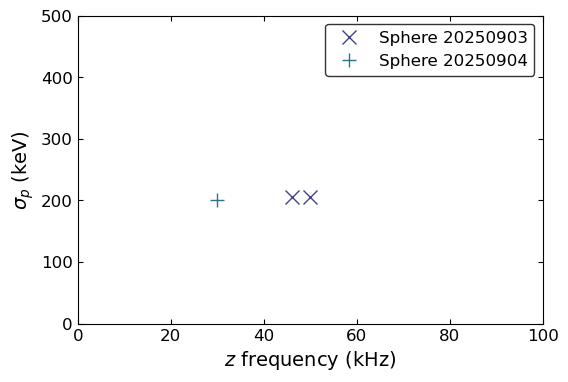

In [18]:
plt.figure(figsize=(6, 4))

plt.plot([50, 46], [205, 205], 'x', markersize=10, label='Sphere 20250903')
# plt.plot(46, 205, 'x', markersize=10, label='Sphere 20250903')
plt.plot(30, 200, '+', markersize=10, label='Sphere 20250904')

plt.xlim(0, 100)
plt.ylim(0, 500)

plt.xlabel('$z$ frequency (kHz)')
plt.ylabel(r'$\sigma_p$ (keV)')
plt.legend(edgecolor='k')

In [ ]:
from scipy.signal import butter, sosfilt

def demodulate(_sig, _lo, f_samp, f_lp):
    mixed_sig = _sig * _lo

    sos = butter(N=8, Wn=f_lp, btype='lowpass', output='sos', fs=f_samp)
    filtered = sosfilt(sos, mixed_sig)
    
    return filtered

_file = r'/Volumes/LaCie/gas_collisions/pulse_calibration/sphere_20250908/20250910_p10e_5e-8mbar_30khz_d93khz_0/20250910_dfg_p10e_200ns_20v_0.hdf5'

dtt, nn = utils.load_timestreams(_file, ['D', 'F', 'G'])
fs = int(np.ceil(1 / dtt))
zz, ff, dd = nn[0], nn[1], nn[2]

positive_pulse = True
trigger_level = positive_pulse * 0.5
pulse_idx = utils.get_pulse_idx(dd, trigger_level, positive_pulse)


In [51]:
prepulse_window_length = 50000
prepulse_window = utils.get_prepulse_window(zz, pulse_idx[3], prepulse_window_length)

(10000000.0, 20000000.0)

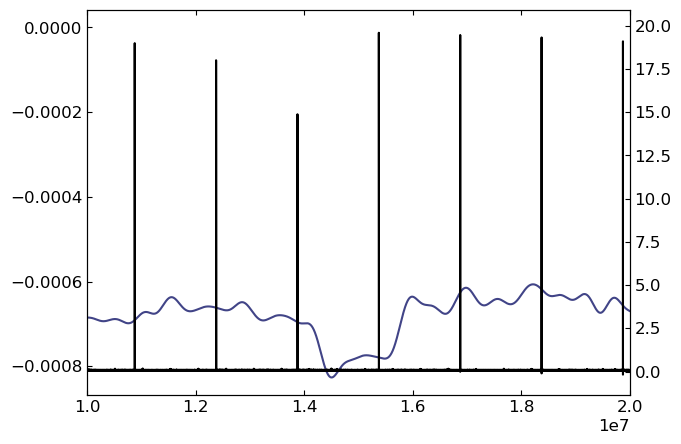

In [74]:
ee = demodulate(zz, ff, fs, 10)
plt.plot(ee)
plt.twinx().plot(dd, 'k')

plt.xlim(1e7, 2e7)

In [52]:
zz_windowed = zz[prepulse_window]
ff_windowed = ff[prepulse_window]

In [53]:
zzf = rfft(zz_windowed)
fff = rfft(ff_windowed)

ff_freq = rfftfreq(n=zz_windowed.size, d=dtt)

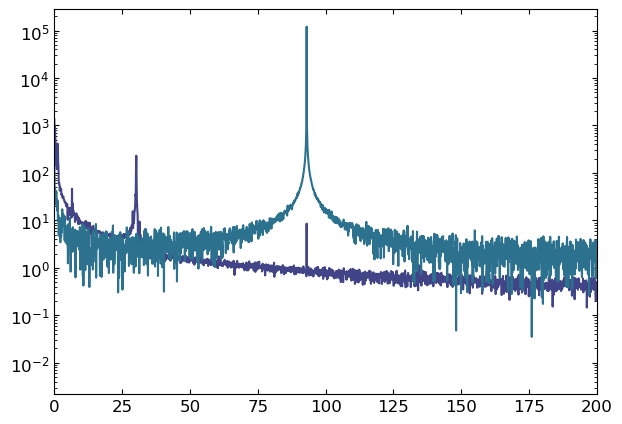

In [56]:
plt.plot(ff_freq/1000, np.abs(zzf))
plt.plot(ff_freq/1000, np.abs(fff))


plt.xlim(0, 200)
plt.yscale('log')

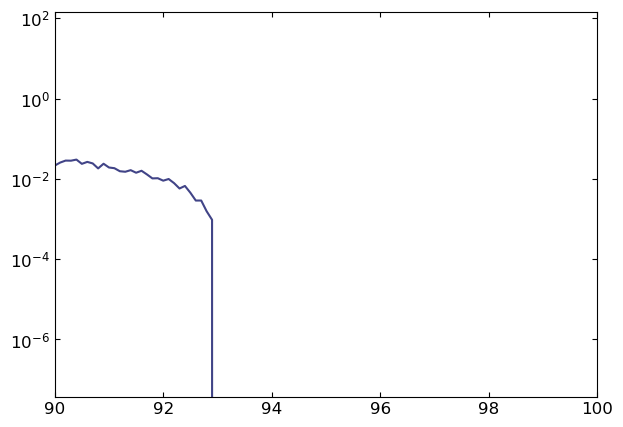

In [39]:
plt.plot(ff/1000, np.real(zzf/fff))

plt.xlim(90, 100)
plt.yscale('log')

In [26]:
ff[np.argmax(np.abs(fff))]

93000.0

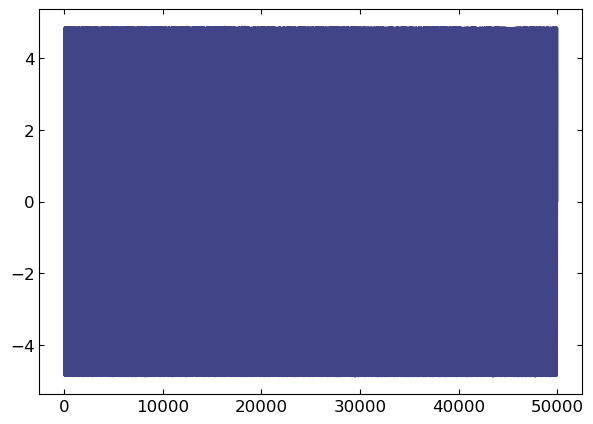

In [14]:
plt.plot(ff_windowed)